<a href="https://colab.research.google.com/github/Abhinavaaa/machine-learning-for-trading/blob/main/EXP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [19]:
import warnings

warnings.filterwarnings('ignore')

In [20]:
data = '/content/kaggle/input/WineQT.csv'

df = pd.read_csv(data, header=None)
print(df.columns)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')


In [21]:
df.shape

(1144, 13)

In [22]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,2
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,3


In [23]:
col_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates','alcohol','quality','Id']


df.columns = col_names

col_names

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'Id']

In [24]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,2
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,3


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         1144 non-null   object
 1   volatile acidity      1144 non-null   object
 2   citric acid           1144 non-null   object
 3   residual sugar        1144 non-null   object
 4   chlorides             1144 non-null   object
 5   free sulfur dioxide   1144 non-null   object
 6   total sulfur dioxide  1144 non-null   object
 7   density               1144 non-null   object
 8   pH                    1144 non-null   object
 9   sulphates             1144 non-null   object
 10  alcohol               1144 non-null   object
 11  quality               1144 non-null   object
 12  Id                    1144 non-null   object
dtypes: object(13)
memory usage: 116.3+ KB


In [26]:
col_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates','alcohol','quality','Id']

for col in col_names:
    
    print(df[col].value_counts()) 

7.2              43
7.1              41
7.8              40
7.0              40
7.5              37
                 ..
12.2              1
13.7              1
13.5              1
13.8              1
fixed acidity     1
Name: fixed acidity, Length: 92, dtype: int64
0.6      32
0.5      32
0.43     31
0.39     29
0.58     28
         ..
1.025     1
0.565     1
0.865     1
0.965     1
0.16      1
Name: volatile acidity, Length: 136, dtype: int64
0.0            99
0.49           47
0.24           42
0.02           35
0.01           26
               ..
0.62            1
0.72            1
0.75            1
1.0             1
citric acid     1
Name: citric acid, Length: 78, dtype: int64
2.0     107
2.1     103
1.8      92
2.2      88
1.9      80
       ... 
2.95      1
3.65      1
7.2       1
7.3       1
4.4       1
Name: residual sugar, Length: 81, dtype: int64
0.08                   48
0.077                  41
0.07400000000000001    38
0.084                  38
0.078                  36
 

In [28]:
df['pH'].value_counts()

3.3     41
3.36    40
3.38    38
3.39    37
3.26    33
        ..
2.86     1
2.95     1
2.74     1
3.75     1
2.9      1
Name: pH, Length: 88, dtype: int64

In [13]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [29]:
X = df.drop(['pH'], axis=1)

y = df['pH']

In [30]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [31]:
X_train.shape, X_test.shape

((766, 12), (378, 12))

In [32]:
X_train.dtypes

fixed acidity           object
volatile acidity        object
citric acid             object
residual sugar          object
chlorides               object
free sulfur dioxide     object
total sulfur dioxide    object
density                 object
sulphates               object
alcohol                 object
quality                 object
Id                      object
dtype: object

In [33]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,Id
513,8.4,0.56,0.04,2.0,0.08199999999999999,10.0,22.0,0.9976,0.44,9.6,5,720
259,12.5,0.46,0.63,2.0,0.071,6.0,15.0,0.9988,0.87,10.2,5,363
204,9.9,0.59,0.07,3.4,0.102,32.0,71.0,1.00015,0.71,9.8,5,285
1040,6.4,0.42,0.09,2.3,0.054000000000000006,34.0,64.0,0.99724,0.68,10.4,6,1460
736,7.1,0.43,0.17,1.8,0.08199999999999999,27.0,51.0,0.99634,0.64,10.4,5,1047


In [39]:
!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached category_encoders-2.6.0-py2.py3-none-any.whl (81 kB)


In [44]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density','sulphates','alcohol','quality','Id']
)


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [45]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,Id
513,1,1,1,1,1,1,1,1,1,1,1,1
259,2,2,2,1,2,2,2,2,2,2,1,2
204,3,3,3,2,3,3,3,3,3,3,1,3
1040,4,4,4,3,4,4,4,4,4,4,2,4
736,5,5,5,4,1,5,5,5,5,4,1,5


In [46]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,Id
218,15.0,75.0,47.0,15.0,49.0,8.0,2.0,7.0,5.0,31.0,2,-1.0
809,34.0,30.0,11.0,6.0,-1.0,2.0,61.0,282.0,17.0,5.0,2,-1.0
501,28.0,26.0,47.0,12.0,22.0,42.0,74.0,18.0,36.0,1.0,5,-1.0
649,33.0,41.0,8.0,-1.0,28.0,13.0,83.0,215.0,5.0,31.0,2,-1.0
323,40.0,3.0,48.0,3.0,86.0,6.0,1.0,77.0,34.0,10.0,1,-1.0


In [47]:
from sklearn.tree import DecisionTreeClassifier


In [48]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [49]:
y_pred_gini = clf_gini.predict(X_test)


In [50]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.0317


In [51]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['3.36', '3.36', '3.36', '3.36', '3.36', '3.36', '3.36', '3.36',
       '3.36', '3.36', '3.36', '3.36', '3.36', '3.36', '3.36', '3.36',
       '3.36', '3.36', '3.36', '3.36', '3.36', '3.36', '3.36', '3.36',
       '3.36', '3.36', '3.36', '3.36', '3.36', '3.36', '3.36', '3.36',
       '3.36', '3.36', '3.36', '3.36', '3.36', '3.36', '3.36', '3.36',
       '3.36', '3.36', '3.36', '3.36', '3.36', '3.36', '3.36', '3.36',
       '3.36', '3.36', '3.36', '3.36', '3.36', '3.36', '3.36', '3.36',
       '3.36', '3.36', '3.36', '3.36', '3.36', '3.36', '3.36', '3.36',
       '3.36', '3.3', '3.36', '3.36', '3.36', '3.3', '3.36', '3.36',
       '3.3', '3.3', '3.36', '3.36', '3.36', '3.36', '3.36', '3.3',
       '3.36', '3.3', '3.36', '3.3', '3.17', '3.36', '3.3', '3.3', '3.17',
       '3.36', '3.36', '3.17', '3.17', '3.36', '3.3', '3.36', '3.17',
       '3.3', '3.36', '3.17', '3.36', '3.36', '3.36', '3.3', '3.36',
       '3.36', '3.3', '3.17', '3.3', '3.3', '3.3', '3.36', '3.17', '3.3',
       

In [52]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.0705
Test set score: 0.0317


[Text(0.5, 0.875, 'x[5] <= 42.5\ngini = 0.98\nsamples = 766\nvalue = [1, 1, 2, 1, 2, 3, 4, 2, 1, 5, 3, 5, 4, 2\n5, 5, 7, 12, 7, 8, 3, 15, 16, 12, 14, 11, 13\n18, 17, 20, 10, 16, 15, 18, 19, 22, 18, 28, 18\n22, 16, 21, 20, 28, 18, 29, 25, 19, 12, 17, 8\n14, 10, 6, 14, 5, 4, 6, 10, 12, 7, 9, 4, 6\n5, 6, 6, 4, 6, 1, 2, 2, 3, 2, 1, 1, 1, 1]'),
 Text(0.25, 0.625, 'x[0] <= 48.5\ngini = 0.979\nsamples = 746\nvalue = [1, 1, 2, 1, 2, 3, 3, 2, 1, 5, 3, 5, 4, 2\n5, 4, 7, 12, 7, 8, 3, 15, 16, 12, 14, 10, 13\n17, 17, 18, 9, 15, 15, 18, 19, 21, 18, 26, 18\n22, 15, 21, 20, 28, 18, 29, 25, 19, 12, 17, 8\n14, 10, 6, 7, 5, 4, 6, 10, 12, 7, 8, 4, 6, 5\n6, 6, 4, 6, 1, 2, 2, 3, 2, 1, 1, 1, 1]'),
 Text(0.125, 0.375, 'x[8] <= 36.5\ngini = 0.977\nsamples = 610\nvalue = [1, 1, 1, 1, 0, 1, 0, 1, 1, 3, 2, 3, 3, 1\n2, 2, 6, 7, 6, 5, 3, 9, 13, 6, 6, 5, 9, 10\n14, 12, 7, 14, 12, 13, 16, 17, 17, 22, 16, 21\n13, 21, 19, 24, 17, 26, 25, 18, 12, 17, 8, 14\n9, 6, 7, 5, 3, 5, 9, 10, 7, 6, 3, 5, 3, 4\n6, 4, 6, 0, 2, 2, 2,

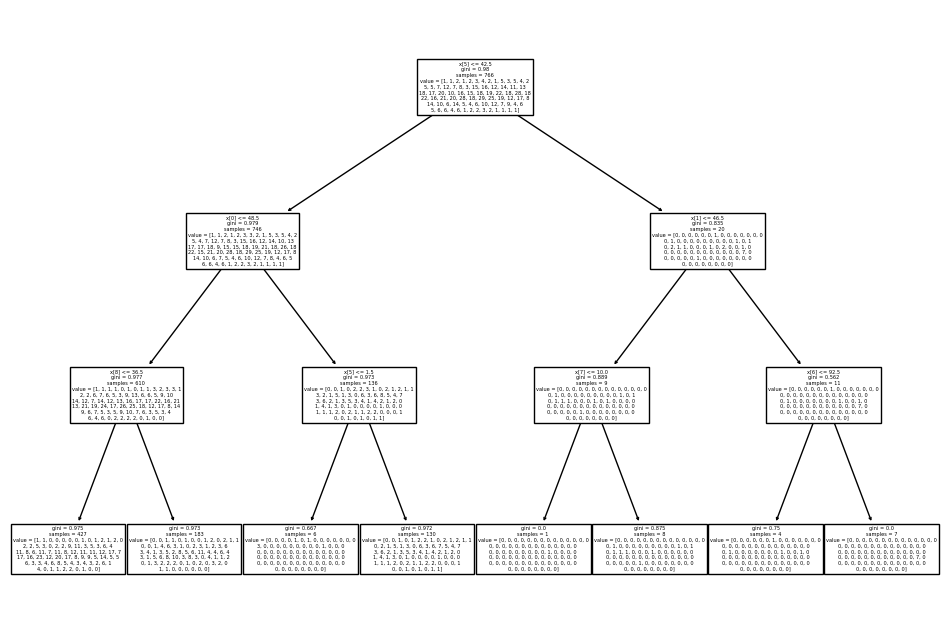

In [53]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

In [60]:
import graphviz
from sklearn import tree

# create a decision tree classifier
clf = tree.DecisionTreeClassifier()

# fit the classifier to your data
clf.fit(X_train, y_train)

# create a Graphviz visualization of the decision tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=y_train.unique(),  
                                filled=True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data)

# display the decision tree
graph


In [61]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [62]:
y_pred_en = clf_en.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.0344


In [64]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['3.39', '3.39', '3.39', '3.39', '3.39', '3.39', '3.39', '3.39',
       '3.39', '3.39', '3.39', '3.39', '3.36', '3.39', '3.36', '3.39',
       '3.36', '3.36', '3.36', '3.36', '3.39', '3.39', '3.36', '3.36',
       '3.36', '3.39', '3.39', '3.39', '3.36', '3.36', '3.36', '3.36',
       '3.39', '3.39', '3.36', '3.39', '3.36', '3.36', '3.39', '3.36',
       '3.36', '3.36', '3.36', '3.36', '3.36', '3.36', '3.36', '3.39',
       '3.39', '3.39', '3.39', '3.39', '3.36', '3.36', '3.36', '3.36',
       '3.39', '3.36', '3.36', '3.36', '3.36', '3.39', '3.36', '3.36',
       '3.39', '3.3', '3.39', '3.36', '3.36', '3.3', '3.39', '3.36',
       '3.3', '3.3', '3.36', '3.36', '3.36', '3.36', '3.36', '3.3',
       '3.36', '3.3', '3.19', '3.3', '3.19', '3.36', '3.3', '3.3', '3.17',
       '3.36', '3.39', '3.19', '3.17', '3.39', '3.3', '3.39', '3.17',
       '3.3', '3.39', '3.17', '3.39', '3.36', '3.39', '3.3', '3.36',
       '3.39', '3.3', '3.17', '3.3', '3.3', '3.28', '3.36', '3.17',
       '3.28'

In [65]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.0849


In [66]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.0849
Test set score: 0.0344


[Text(0.5, 0.875, 'x[0] <= 47.5\nentropy = 5.846\nsamples = 766\nvalue = [1, 1, 2, 1, 2, 3, 4, 2, 1, 5, 3, 5, 4, 2\n5, 5, 7, 12, 7, 8, 3, 15, 16, 12, 14, 11, 13\n18, 17, 20, 10, 16, 15, 18, 19, 22, 18, 28, 18\n22, 16, 21, 20, 28, 18, 29, 25, 19, 12, 17, 8\n14, 10, 6, 14, 5, 4, 6, 10, 12, 7, 9, 4, 6\n5, 6, 6, 4, 6, 1, 2, 2, 3, 2, 1, 1, 1, 1]'),
 Text(0.25, 0.625, 'x[8] <= 36.5\nentropy = 5.727\nsamples = 623\nvalue = [1, 1, 1, 1, 0, 1, 1, 1, 1, 3, 2, 3, 3, 1\n2, 3, 6, 7, 6, 5, 3, 9, 13, 6, 6, 5, 9, 10\n14, 14, 8, 15, 12, 13, 16, 18, 17, 23, 16, 21\n13, 21, 19, 24, 17, 26, 25, 18, 12, 17, 8, 14\n9, 6, 13, 5, 3, 5, 9, 10, 7, 6, 3, 5, 3, 4\n6, 4, 6, 0, 2, 1, 2, 2, 0, 1, 0, 0]'),
 Text(0.125, 0.375, 'x[8] <= 12.5\nentropy = 5.619\nsamples = 440\nvalue = [1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0\n2, 3, 5, 3, 0, 2, 2, 9, 11, 3, 5, 3, 6, 4\n11, 10, 7, 12, 7, 11, 8, 13, 11, 12, 12, 17, 7\n17, 16, 23, 12, 20, 17, 8, 9, 9, 5, 14, 5, 5\n12, 3, 3, 4, 6, 8, 5, 4, 3, 4, 3, 2, 6, 1\n4, 0, 1, 0, 2, 2, 

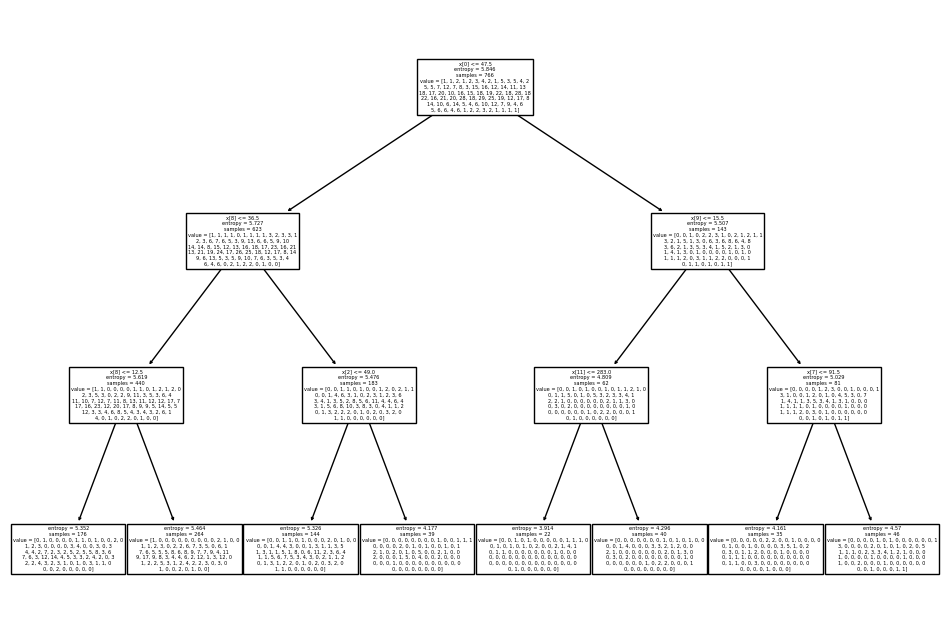

In [67]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

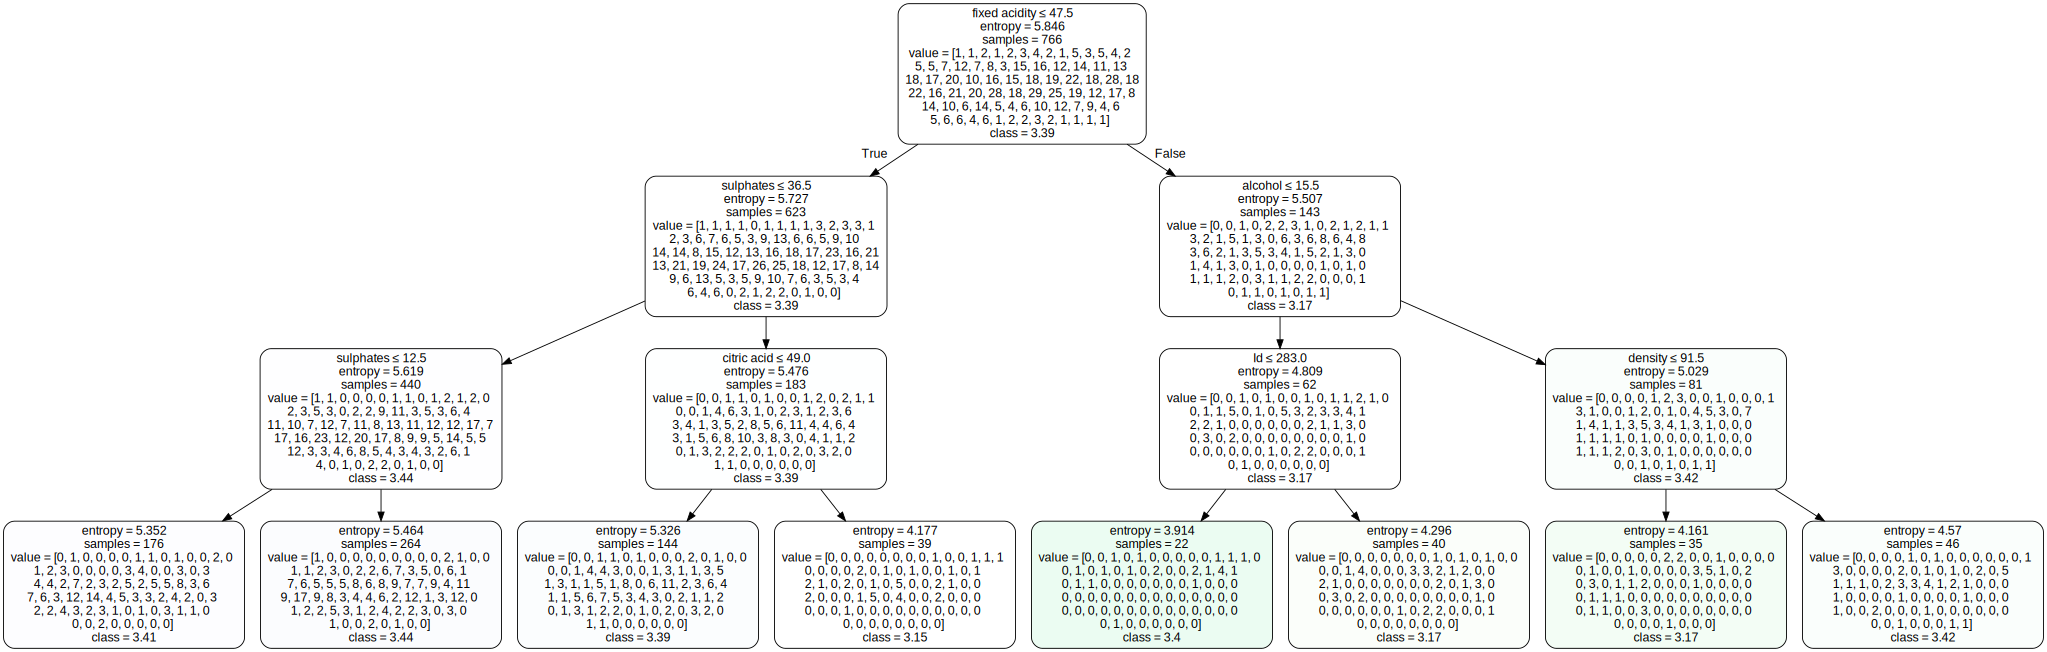

In [68]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [69]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

        2.89       0.00      0.00      0.00         3
        2.92       0.00      0.00      0.00         1
        2.93       0.00      0.00      0.00         2
        2.95       0.00      0.00      0.00         1
        2.98       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         2
        3.01       0.00      0.00      0.00         2
        3.02       0.00      0.00      0.00         1
        3.03       0.00      0.00      0.00         1
        3.04       0.00      0.00      0.00         2
        3.05       0.00      0.00      0.00         2
        3.06       0.00      0.00      0.00         2
        3.07       0.00      0.00      0.00         4
        3.08       0.00      0.00      0.00         4
        3.09       0.00      0.00      0.00         3
         3.1       0.00      0.00      0.00         3
        3.12       0.00      0.00      0.00         5
        3.13       0.00    